In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier


# load dataset
dataframe = pandas.read_table('/content/experimantal_canid_GraphFeatures.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)
dataset = data.values


# split into input (X) and output (Y) variables
#l = 36893 
l = 17487
X = dataset[:,0:]
# Y = dataset[100:200, 1:10]
for col in data.columns: 
    print(col)
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == True:
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]

print(labels.count(0))
print(labels.count(1))
print(features)

print(features.shape)
# df = dataframe.corr()

# #print(df)

# corrMatrix = data.corr()
# print(corrMatrix)

# sn.heatmap(corrMatrix, annot=True, fmt = ".1g")
# plt.show()





FileNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracyList = []

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
gnb = GaussianNB()

  # Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))

cm = confusion_matrix(test_labels, preds)

print(cm)

0.8714260959972275
[[5029  740]
 [   2    0]]


In [ ]:
Without adding 10 more attacks
0.9964695498676082
[[12339     2]
 [   42    80]]

Adding 10 more attacks
 0.9959890903256858
[[12348     0]
 [   50    68]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import numpy as np

accuracyList = []

for i in range(1, 1000, 1):
# Split our data
  train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= i)#

  # Initialize our classifier
  gnb = GaussianNB()

  # Train our classifier
  model = gnb.fit(train, train_labels)
  preds = gnb.predict(test)
  
  # Evaluate accuracy
  accuracyList.append(accuracy_score(test_labels, preds))

print(np.max(accuracyList))

0.9171948968948086


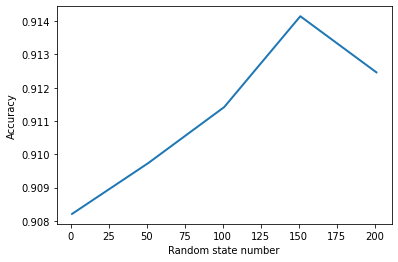

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([i for i in range(1,220,50)],accuracyList, linewidth=2.0)
plt.xlabel("Random state number")
plt.ylabel("Accuracy")
plt.savefig('random.PNG', bbox_inches = "tight")

#plt.bar([i for i in range(0,1000)],np.array(accuracyList), width = .8, align='center', alpha=0.5)

[0.06415378 0.06301421 0.14551374 0.0001628  0.1486319  0.02151399
 0.06450441 0.13359214 0.00030054 0.0028677 ]


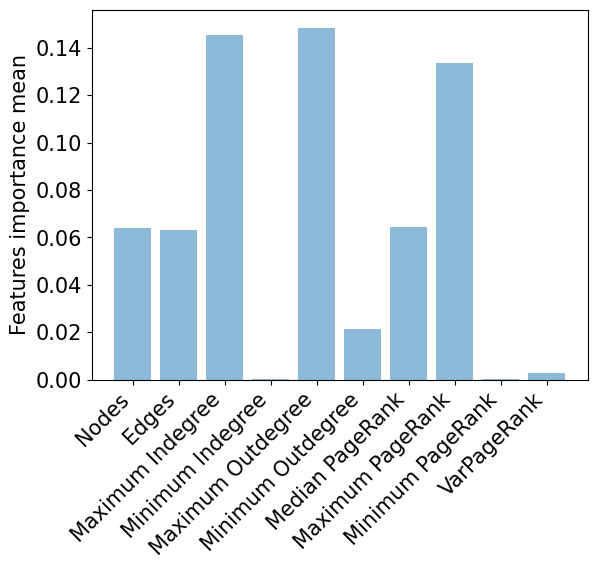

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

imps = permutation_importance(gaussian_nb, X_test, y_test)
print(imps.importances_mean)
an = ["Nodes","Edges","Maximum Indegree","Minimum Indegree","Maximum Outdegree","Minimum Outdegree", "Median PageRank",
      "Maximum PageRank","Minimum PageRank","VarPageRank"]
plt.bar(an, np.array(imps.importances_mean), width = .8, align='center', alpha=0.5)
plt.xticks(rotation=45, ha ='right', fontsize = 15)
plt.ylabel('Features importance mean', fontsize = 15)
plt.tick_params(labelsize=15)
plt.savefig('feature_importance_.PNG', bbox_inches = "tight")
plt.savefig('feature_importance_.svg', bbox_inches = "tight")
plt.savefig('feature_importance_.pdf', bbox_inches = "tight")
# plt.savefig('feature_importance_spoof.PNG', bbox_inches = "tight")
# plt.savefig('feature_importance_spoof.svg', bbox_inches = "tight")